In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
from xrd_functions import plot_xrd, plot_rsm

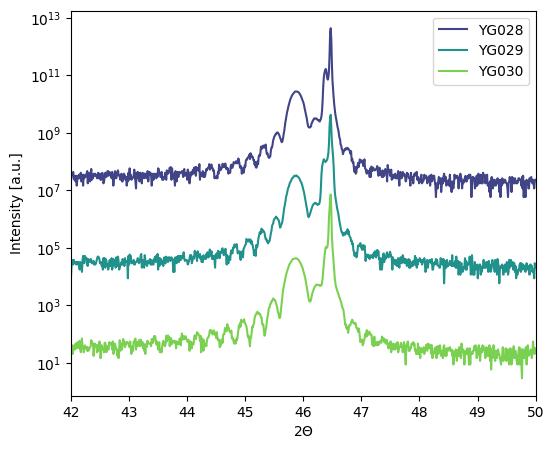

In [56]:
# %matplotlib notebook
%matplotlib inline

files = [
        '../datasets/plume_dynamic_SRO/set_1-YG028-030/xrd/YG028-SRO001-STO001-06022022.xrdml',
        '../datasets/plume_dynamic_SRO/set_1-YG028-030/xrd/YG029-SRO001-STO001-40_50-scan_3-06052022.xrdml',
        '../datasets/plume_dynamic_SRO/set_1-YG028-030/xrd/YG030-SRO001-STO001-scan_2-40_50-06072022.xrdml'
        ]

labels = ['YG028', 'YG029', 'YG030']
fig, ax = plt.subplots(figsize=(6,5))
plot_xrd(ax, files, labels, xrange=(42,50), diff=1e3, save_file='../datasets/YG028-030_xrd.svg')

In [44]:
import numpy as np
from matplotlib import (pyplot as plt, animation, colors, ticker, path, patches, patheffects)
import pylab as pl
import scipy
from scipy import special
from scipy import signal
from scipy.signal import savgol_filter

def visualize_afm_image(img, colorbar_range, figsize=(6,4), scalebar_dict=None, filename=None, printing=None, **kwargs):
    '''
    Visualize AFM image with scalebar and colorbar.
    -----------
    Parameters:
        img: 2D numpy array, AFM image;
        colorbar_range: tuple, Range of colorbar;
        scalebar_dict: dict, Dictionary of scalebar parameters;
        filename: str, Filename to save the image;
    -----------
    Returns: None;
    '''

    fig, ax = plt.subplots(1, 1, figsize=figsize)
    im = ax.imshow(img)
    
    if scalebar_dict:
        scalebar(ax, image_size=scalebar_dict['image_size'], scale_size=scalebar_dict['scale_size'], 
                 units=scalebar_dict['units'], loc='br')

    if isinstance(colorbar_range, tuple) or isinstance(colorbar_range, list):
        im.set_clim(colorbar_range) 
        
    fig.colorbar(im, ax=ax)
    
    ax.tick_params(which='both', bottom=False, left=False, right=False, top=False, labelbottom=False)
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])

    # prints the figure
    if printing is not None and filename is not None:
        printing.savefig(fig, filename, **kwargs)  
    plt.show()


"""
Created on Tue Oct 09 16:39:00 2018
@author: Joshua C. Agar
"""
from scipy import special
from matplotlib import animation, colors, ticker, path, patches, patheffects

Path = path.Path
PathPatch = patches.PathPatch
erf = special.erf
cmap = plt.get_cmap('viridis')

def path_maker(axes, locations, facecolor, edgecolor, linestyle, lineweight):
    """
    Adds path to figure
    Parameters
    ----------
    axes : matplotlib axes
        axes which to add the plot to
    locations : numpy array
        location to position the path
    facecolor : str, optional
        facecolor of the path
    edgecolor : str, optional
        edgecolor of the path
    linestyle : str, optional
        sets the style of the line, using conventional matplotlib styles
    lineweight : float, optional
        thickness of the line
    """
    vertices = []
    codes = []
    codes = [Path.MOVETO] + [Path.LINETO] * 3 + [Path.CLOSEPOLY]
    # extracts the vertices used to construct the path
    vertices = [(locations[0], locations[2]),
                (locations[1], locations[2]),
                (locations[1], locations[3]),
                (locations[0], locations[3]),
                (0, 0)]
    vertices = np.array(vertices, float)
    #  makes a path from the vertices
    path = Path(vertices, codes)
    pathpatch = PathPatch(path, facecolor=facecolor, edgecolor=edgecolor,
                          ls=linestyle, lw=lineweight)
    # adds path to axes
    axes.add_patch(pathpatch)

def scalebar(axes, image_size, scale_size, units='nm', loc='br'):
    """
    Adds scalebar to figures
    Parameters
    ----------
    axes : matplotlib axes
        axes which to add the plot to
    image_size : int
        size of the image in nm
    scale_size : str, optional
        size of the scalebar in units of nm
    units : str, optional
        sets the units for the label
    loc : str, optional
        sets the location of the label
    """

    # gets the size of the image
    x_lim, y_lim = axes.get_xlim(), axes.get_ylim()
    x_size, y_size = np.abs(
        np.int32(np.floor(x_lim[1] - x_lim[0]))), np.abs(np.int32(np.floor(y_lim[1] - y_lim[0])))
    # computes the fraction of the image for the scalebar
    fract = scale_size / image_size

    x_point = np.linspace(x_lim[0], x_lim[1],
                          np.int32(np.floor(image_size)))
    y_point = np.linspace(y_lim[0], y_lim[1],
                          np.int32(np.floor(image_size)))

    # sets the location of the scalebar"
    if loc == 'br':
        x_start = x_point[np.int32(.9 * image_size // 1)]
        x_end = x_point[np.int32((.9 - fract) * image_size // 1)]
        y_start = y_point[np.int32(.1 * image_size // 1)]
        y_end = y_point[np.int32((.1 + .025) * image_size // 1)]
        y_label_height = y_point[np.int32((.1 + .075) * image_size // 1)]
    elif loc == 'tr':
        x_start = x_point[np.int32(.9 * image_size // 1)]
        x_end = x_point[np.int32((.9 - fract) * image_size // 1)]
        y_start = y_point[np.int32(.9 * image_size // 1)]
        y_end = y_point[np.int32((.9 - .025) * image_size // 1)]
        y_label_height = y_point[np.int32((.9 - .075) * image_size // 1)]

    # makes the path for the scalebar
    path_maker(axes, [x_start, x_end, y_start, y_end], 'w', 'k', '-', 1)

    # adds the text label for the scalebar
    axes.text((x_start + x_end) / 2,
              y_label_height,
              '{0} {1}'.format(scale_size, units),
              size=14, weight='bold', ha='center',
              va='center', color='w',
              path_effects=[patheffects.withStroke(linewidth=1.5,
                                                   foreground="k")])
    
    

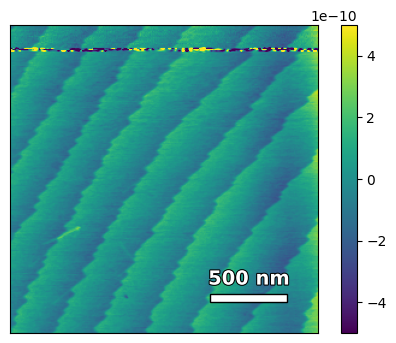

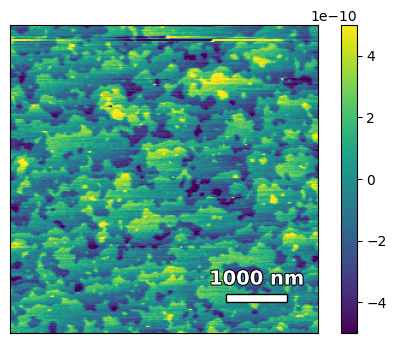

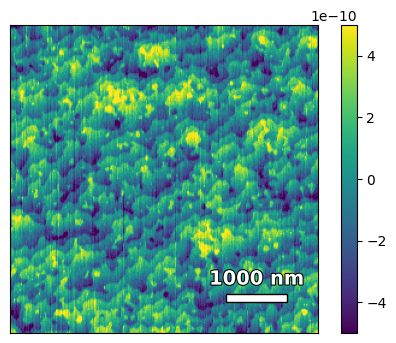

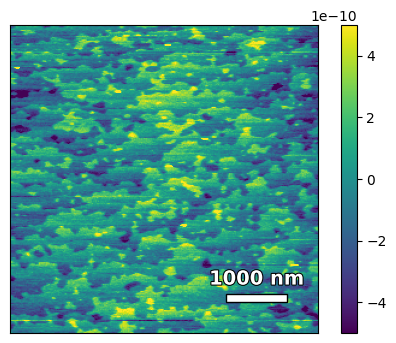

In [54]:
img0 = np.loadtxt('../datasets/plume_dynamic_SRO/set_1-YG028-030/afm/s40000.txt')[:256]
scalebar_dict = {'image_size': 2000, 'scale_size': 500, 'units': 'nm'}
visualize_afm_image(img0, colorbar_range=[-5e-10, 5e-10], figsize=(6,4), scalebar_dict=scalebar_dict)

img1 = np.loadtxt('../datasets/plume_dynamic_SRO/set_1-YG028-030/afm/yg0280000.txt')[:256]
scalebar_dict = {'image_size': 5000, 'scale_size': 1000, 'units': 'nm'}
visualize_afm_image(img1, colorbar_range=[-5e-10, 5e-10], figsize=(6,4), scalebar_dict=scalebar_dict)

img2 = np.loadtxt('../datasets/plume_dynamic_SRO/set_1-YG028-030/afm/yg0290005.txt')[:256]
img2 = np.rot90(img2)
scalebar_dict = {'image_size': 5000, 'scale_size': 1000, 'units': 'nm'}
visualize_afm_image(img2, colorbar_range=[-5e-10, 5e-10], figsize=(6,4), scalebar_dict=scalebar_dict)

img3 = np.loadtxt('../datasets/plume_dynamic_SRO/set_1-YG028-030/afm/yg0300000.txt')[:256]
scalebar_dict = {'image_size': 5000, 'scale_size': 1000, 'units': 'nm'}
visualize_afm_image(img3, colorbar_range=[-5e-10, 5e-10], figsize=(6,4), scalebar_dict=scalebar_dict)

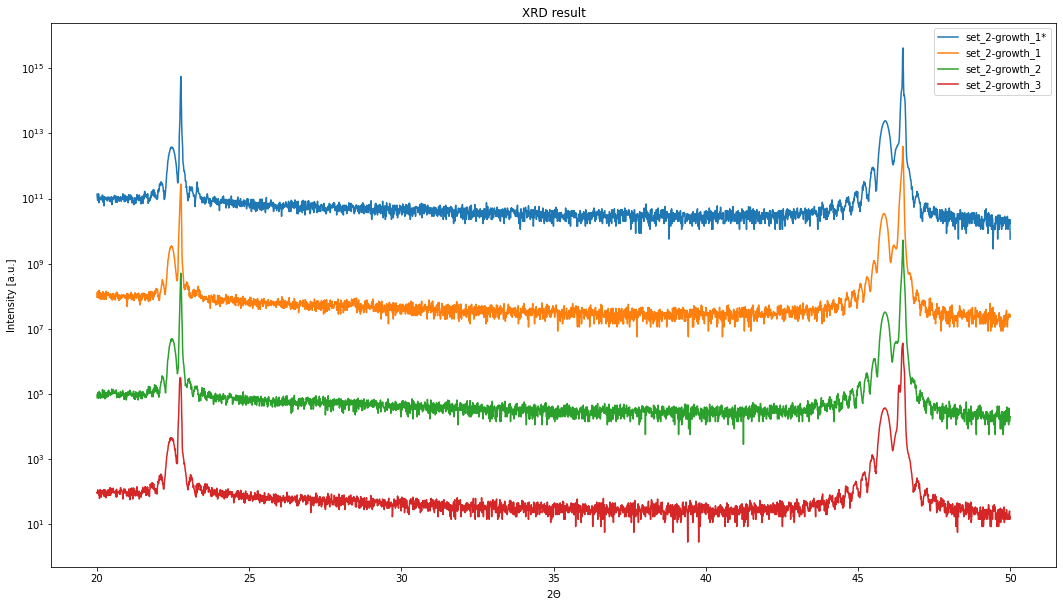

In [107]:
# %matplotlib notebook
%matplotlib inline

files = [
        './xrd/set_2/YG031-SRO001-STO001-06122022.xrdml',
        './xrd/set_2/YG032-SRO001-STO001-06162022.xrdml',
        './xrd/set_2/YG033-SRO001-STO001-06162022.xrdml',
        './xrd/set_2/YG034-SRO001-STO001-06152022.xrdml'
        ]

labels = ['set_2-growth_1*', 'set_2-growth_1', 'set_2-growth_2', 'set_2-growth_3']
plot_xrd(files, labels, diff=1e3, save_path='./set_2-xrd.png')

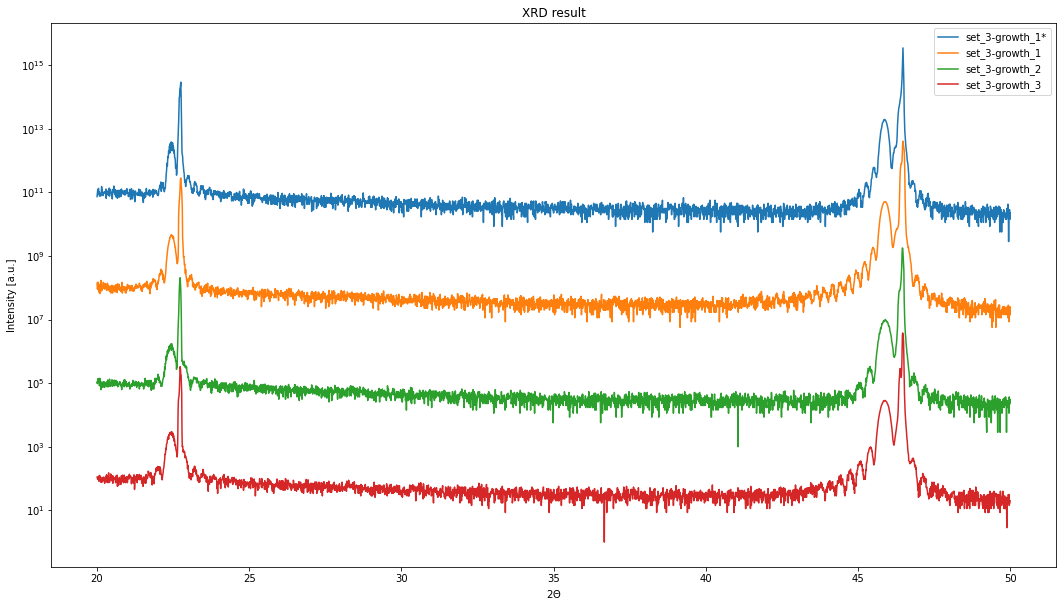

In [108]:
# %matplotlib notebook
%matplotlib inline

files = [
        './xrd/set_3/YG035-SRO001-STO001-06152022.xrdml',
        './xrd/set_3/YG036-SRO001-STO001-06162022.xrdml',
        './xrd/set_3/YG037-SRO001-STO001-06192022.xrdml',
        './xrd/set_3/YG038-SRO001-STO001-06192022.xrdml'
        ]

labels = ['set_3-growth_1*', 'set_3-growth_1', 'set_3-growth_2', 'set_3-growth_3']
plot_xrd(files, labels, diff=1e3, save_path='./set_3-xrd.png')

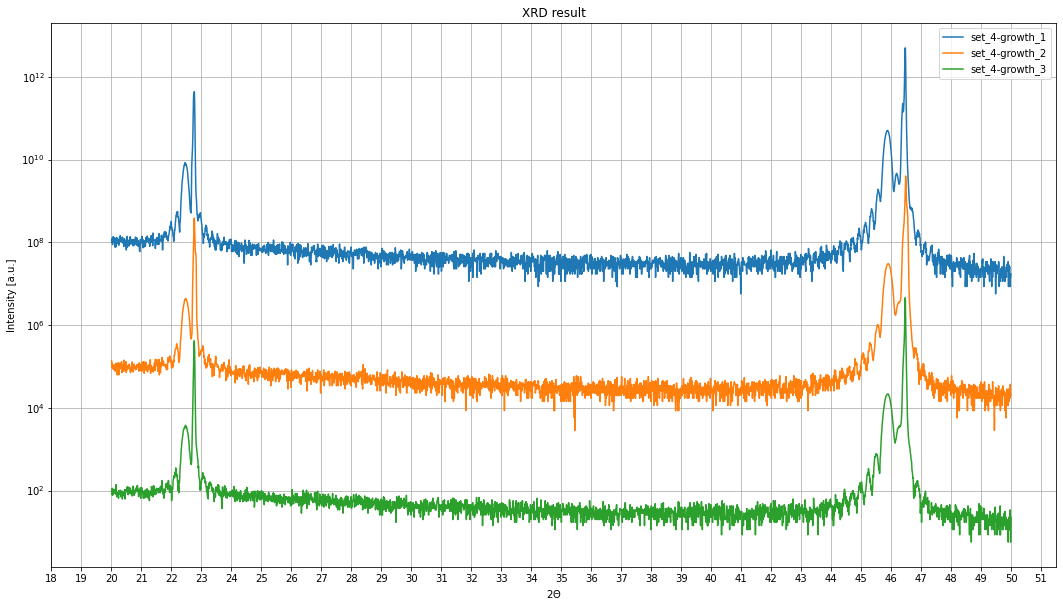

In [5]:
# %matplotlib notebook
%matplotlib inline

files = ['./xrd/set_4/YG039-SRO001-STO001-07142022.xrdml',
         './xrd/set_4/YG040-SRO001-STO001-07142022.xrdml',
         './xrd/set_4/YG041-SRO001-STO001-07142022.xrdml']

labels = ['set_4-growth_1', 'set_4-growth_2', 'set_4-growth_3']
plot_xrd(files, labels, diff=1e3)

In [84]:
# pip install xrayutilities
import numpy as np
import xrayutilities as xu
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

def plot_xrd(files, labels, title='XRD result', diff=1e3, save_path=None, marker=None):
    Ys = [] 
    for file in files:
        out = xu.io.getxrdml_scan(file)
        X = out[0] 
        Ys.append(np.array(out[1:]).reshape(-1))
        
    fig, axes = plt.subplots(figsize=(18, 10))
    
    for i, Y in enumerate(Ys):
        Y[Y==0] = 1  # remove all 0 value
        Y = Y * diff**(len(Ys)-i-1)
        axes.plot(X, Y, marker=marker, label=labels[i])
        
    axes.set_xlabel(r"2$\Theta}$", )
    axes.set_ylabel('Intensity [a.u.]')
    axes.legend()
    plt.yscale('log',base=10) 
    plt.title(title)

    if save_path:
        plt.savefig(save_path, dpi=1200)
    plt.show()
    
    
    , save_path='./set_2-xrd.png'

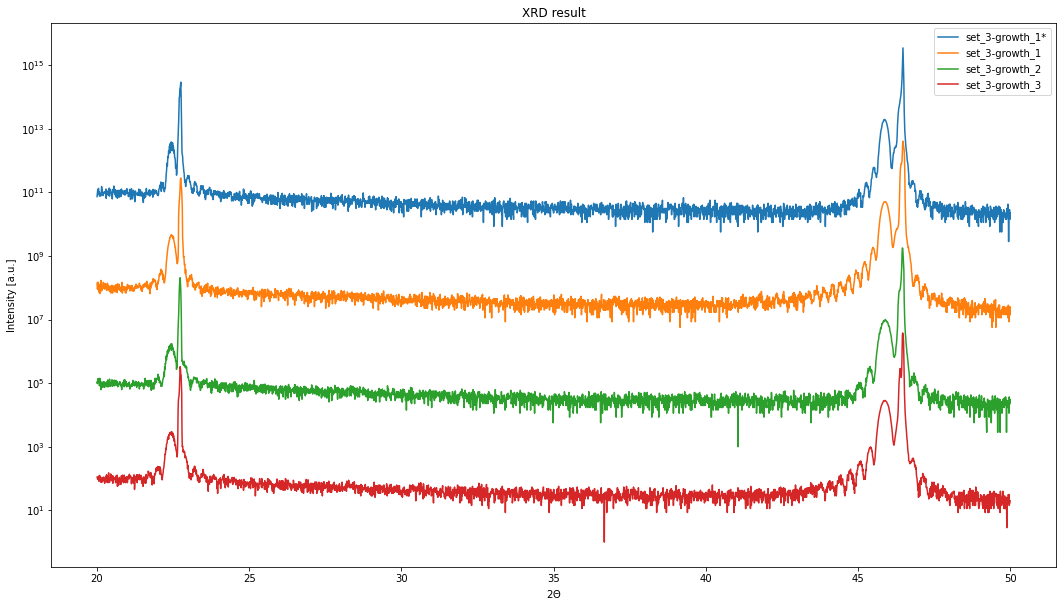

In [85]:
# %matplotlib notebook
%matplotlib inline

files = [
        './xrd/set_3/YG035-SRO001-STO001-06152022.xrdml',
        './xrd/set_3/YG036-SRO001-STO001-06162022.xrdml',
        './xrd/set_3/YG037-SRO001-STO001-06192022.xrdml',
        './xrd/set_3/YG038-SRO001-STO001-06192022.xrdml'
        ]

labels = ['set_3-growth_1*', 'set_3-growth_1', 'set_3-growth_2', 'set_3-growth_3']
plot_xrd(files, labels, diff=1e3, save_path='./set_3-xrd.png')

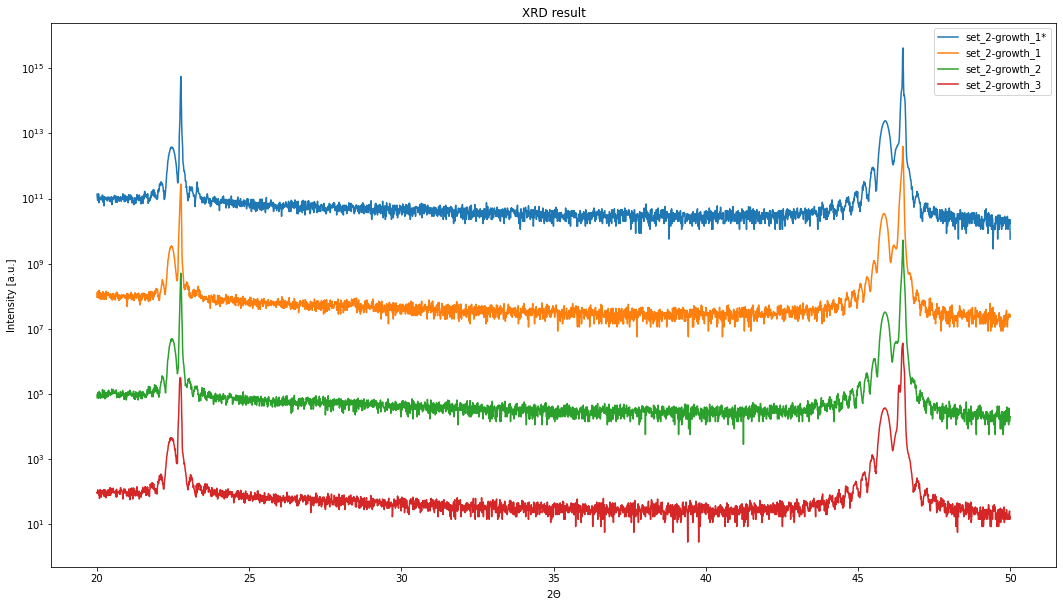

In [86]:
# %matplotlib notebook
%matplotlib inline

files = [
        './xrd/set_2/YG031-SRO001-STO001-06122022.xrdml',
        './xrd/set_2/YG032-SRO001-STO001-06162022.xrdml',
        './xrd/set_2/YG033-SRO001-STO001-06162022.xrdml',
        './xrd/set_2/YG034-SRO001-STO001-06152022.xrdml'
        ]

labels = ['set_2-growth_1*', 'set_2-growth_1', 'set_2-growth_2', 'set_2-growth_3']
plot_xrd(files, labels, diff=1e3, save_path='./set_2-xrd.png')

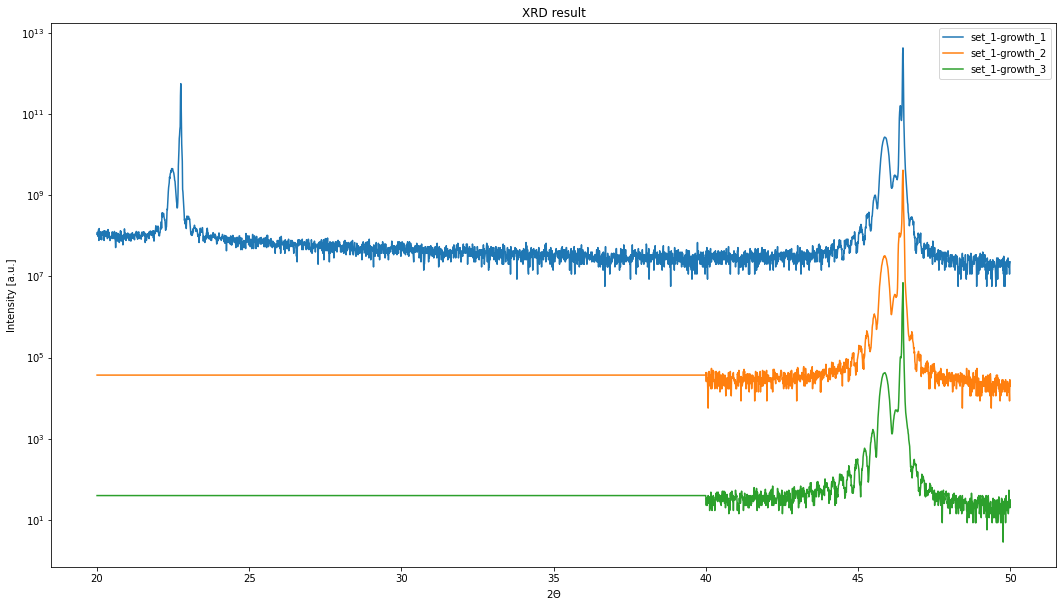

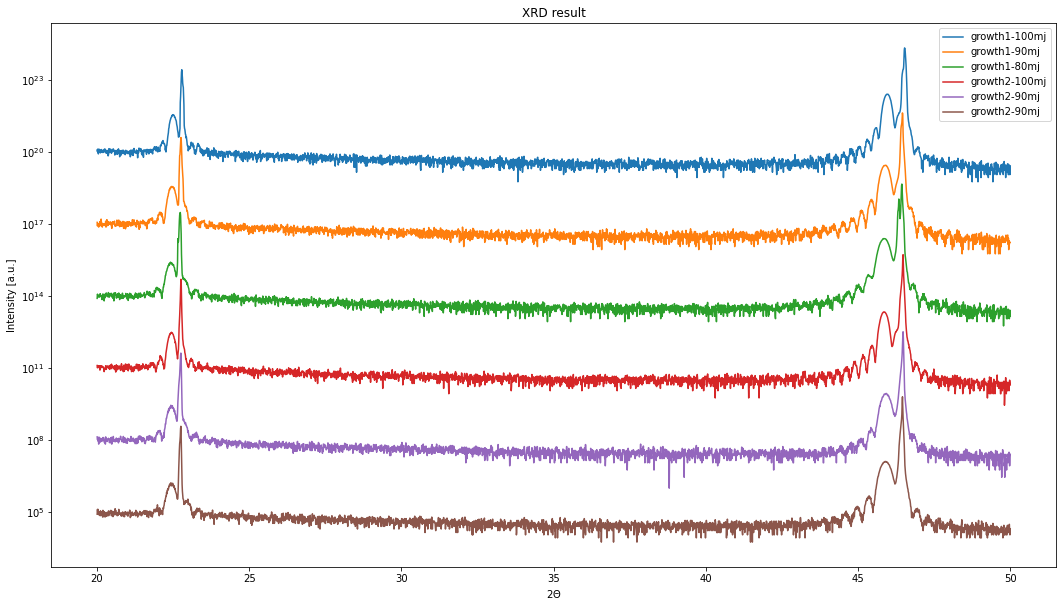

In [20]:
# %matplotlib notebook
%matplotlib inline

files = [
        './xrd/YG021-SRO001-STO001-05252022.xrdml',
        './xrd/YG022-SRO001-STO001-05252022.xrdml',
        './xrd/YG023-SRO001-STO001-05292022-parallel.xrdml',
        './xrd/YG024-SRO001-STO001-05292022.xrdml',
        './xrd/YG025-SRO001-STO001-05302022.xrdml',
        './xrd/YG026-SRO001-STO001-05302022.xrdml'
        ]

labels = ['growth1-100mj', 'growth1-90mj', 'growth1-80mj', 
          'growth2-100mj', 'growth2-90mj', 'growth2-90mj']
plot_xrd(files, labels, diff=1e3)

In [18]:
labels[-]

['growth2-90mj',
 'growth2-90mj',
 'growth2-100mj',
 'growth1-80mj',
 'growth1-90mj',
 'growth1-100mj']

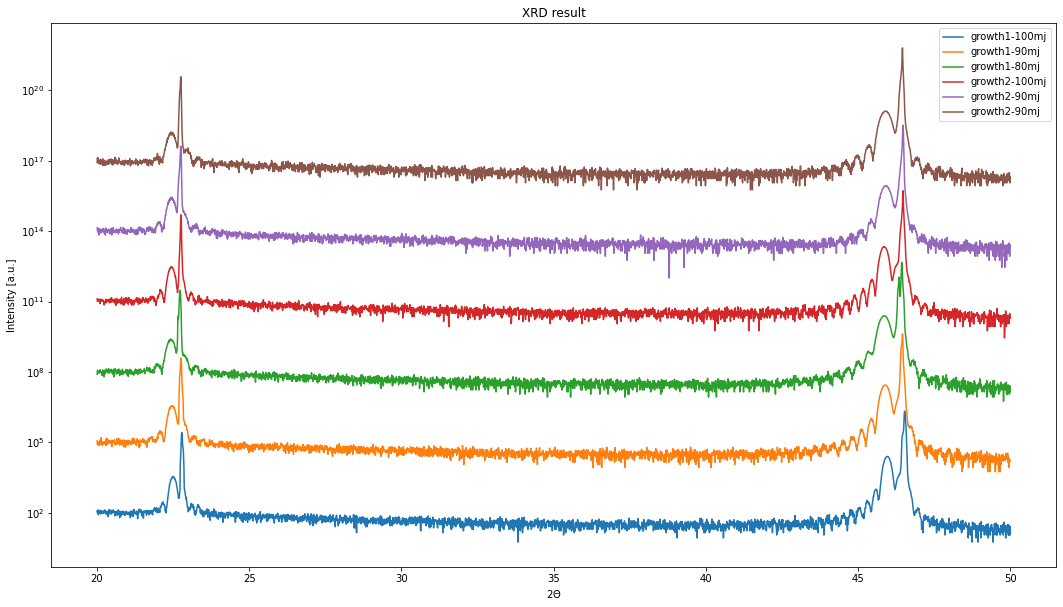

In [16]:
# %matplotlib notebook
%matplotlib inline

files = [
        './xrd/YG021-SRO001-STO001-05252022.xrdml',
        './xrd/YG022-SRO001-STO001-05252022.xrdml',
        './xrd/YG023-SRO001-STO001-05292022-parallel.xrdml',
        './xrd/YG024-SRO001-STO001-05292022.xrdml',
        './xrd/YG025-SRO001-STO001-05302022.xrdml',
        './xrd/YG026-SRO001-STO001-05302022.xrdml'
        ]

labels = ['growth1-100mj', 'growth1-90mj', 'growth1-80mj', 
          'growth2-100mj', 'growth2-90mj', 'growth2-90mj']
plot_xrd(files, labels, diff=1e3)

In [66]:
files = [
        './xrd/set_1/YG028-SRO001-STO001-06022022.xrdml',
        './xrd/set_1/YG029-SRO001-STO001-40_50-scan_3-06052022.xrdml',
        './xrd/set_1/YG030-SRO001-STO001-scan_2-40_50-06072022.xrdml'
        ]

In [39]:
out[0].shape

(1000,)

In [37]:
out[1].shape

(1000,)

In [52]:
    Xs, Ys = [], [] 
    length_list = []
    for file in files:
        out = xu.io.getxrdml_scan(file)
        Xs.append(list(out[0]))
        Ys.append(list(out[1]))
        length_list.append(out[0].shape[0]) 

In [53]:
pad_np=((0,0), (2000,0), (2000,0))

In [61]:
for i in range(len(Ys)):
    Ys[i] = np.pad(Ys[i], pad_np[i], constant_values=1)

In [63]:
Ys = np.stack(Ys)

In [64]:
Ys.shape

(3, 3000)

31


In [71]:
np.mean()

4461.551136363636

In [103]:
# pip install xrayutilities
import numpy as np
import xrayutilities as xu
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

def plot_xrd(files, labels, save_path=None, marker=None):
    Ys = [] 
    for file in files:
        out = xu.io.getxrdml_scan(file)

        X = out[0] 
        Ys.append(np.array(out[1:]).reshape(-1))
        
    fig, axes = plt.subplots(len(Ys), 1, figsize=(18, int(3*len(Ys))))
    
    for i, Y in enumerate(Ys):
#         Y = Y + 10**(diff*i+2)
        axes[i].plot(X, Y, marker=marker, label=labels[i])
        axes[i].set_xlabel(r"2$\Theta}$", )
        axes[i].set_ylabel('Intensity [a.u.]')
        axes[i].set_yscale('log',base=10) 
#         axes[i].set_title(labels[i])
        axes[i].set_ylim([1, 1e7])
        
        axes[i].legend(loc='center')
        axes[i].spines['top'].set_visible(False)
#         axes[i].spines['right'].set_visible(False)
#         axes[i].spines['bottom'].set_visible(False)
#         axes[i].spines['left'].set_visible(False)
    fig.tight_layout()
    plt.show()

    if save_path:
        plt.savefig(save_path, dpi=1200)
        plt.show()

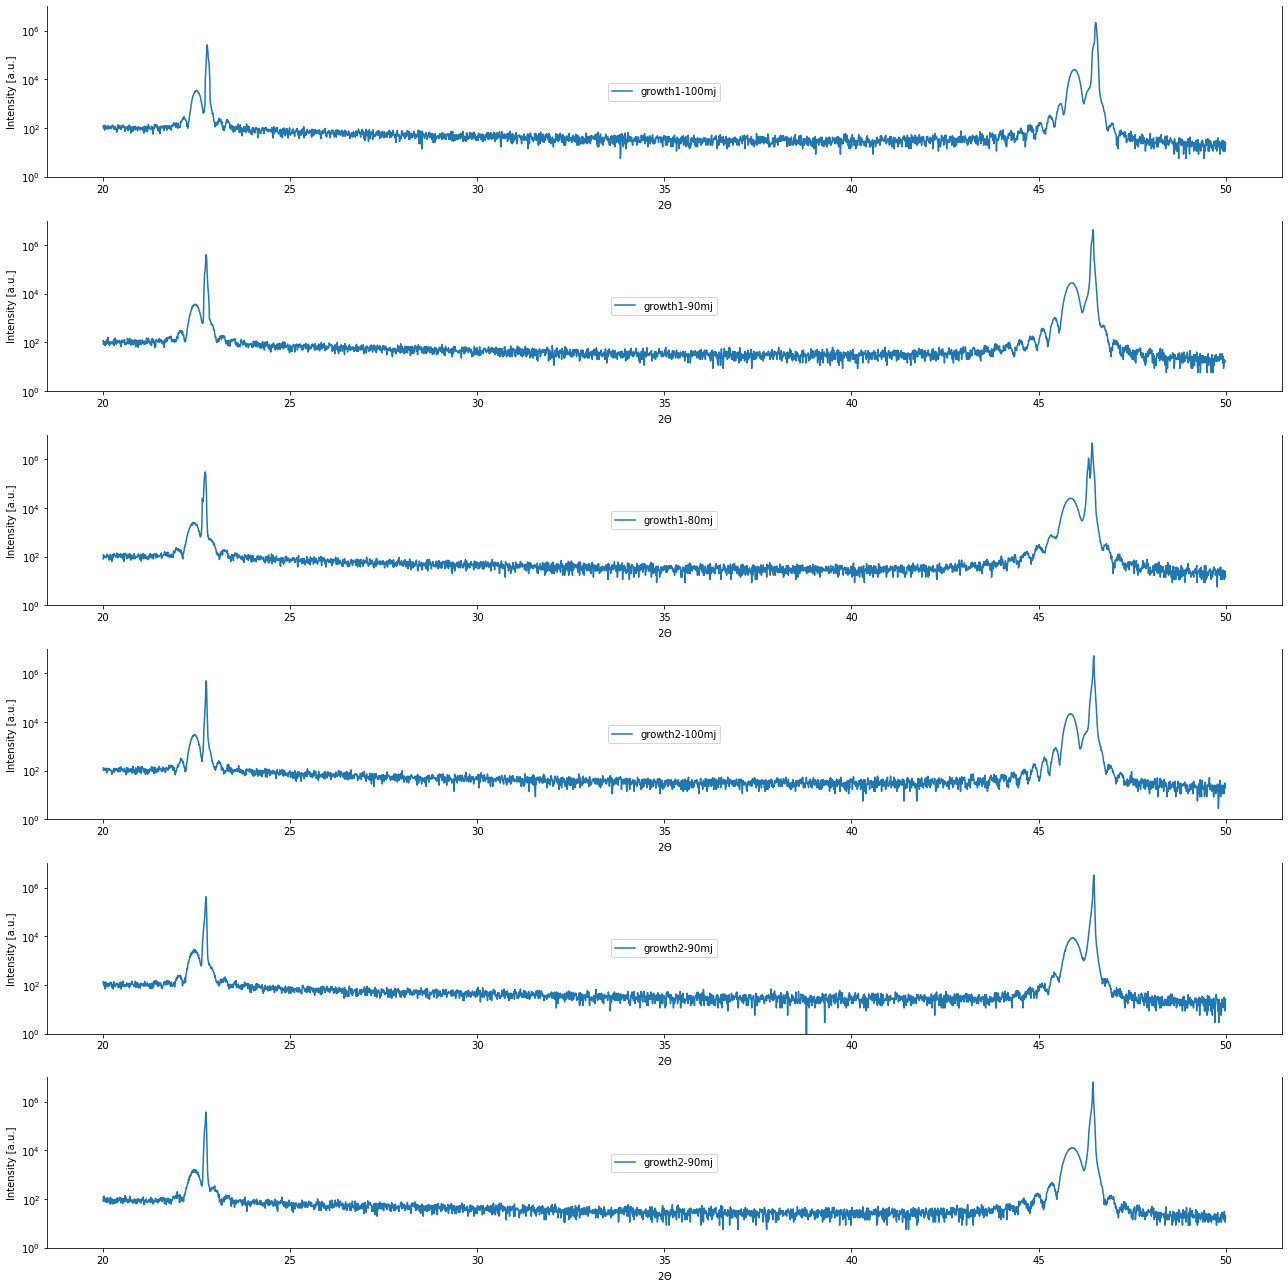

In [104]:
# %matplotlib notebook
%matplotlib inline

files = [
        './xrd/YG021-SRO001-STO001-05252022.xrdml',
        './xrd/YG022-SRO001-STO001-05252022.xrdml',
        './xrd/YG023-SRO001-STO001-05292022-parallel.xrdml',
        './xrd/YG024-SRO001-STO001-05292022.xrdml',
        './xrd/YG025-SRO001-STO001-05302022.xrdml',
        './xrd/YG026-SRO001-STO001-05302022.xrdml',
#         './xrd/YG027-SRO001-STO001-05312022.xrdml',
        ]

labels = ['growth1-100mj', 'growth1-90mj', 'growth1-80mj', 
          'growth2-100mj', 'growth2-90mj', 'growth2-90mj']
plot_xrd(files, labels)

In [106]:
# pip install xrayutilities
import numpy as np
import xrayutilities as xu
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

def plot_xrd(files, labels, title='XRD result', diff=1, save_path=None, marker=None):
    Ys = [] 
    for file in files:
        out = xu.io.getxrdml_scan(file)

        X = out[0] 
        Ys.append(np.array(out[1:]).reshape(-1))
        
    fig, axes = plt.subplots(figsize=(18, 10))
    
    for i, Y in enumerate(Ys):
        Y = Y + 10**(diff*i+2)
        axes.plot(X, Y, marker=marker, label=labels[i])
        
    axes.set_xlabel(r"2$\Theta}$", )
    axes.set_ylabel('Intensity [a.u.]')
    axes.legend()
    plt.yscale('log',base=10) 
    plt.title(title)

    if save_path:
        plt.savefig(save_path, dpi=1200)
        plt.show()

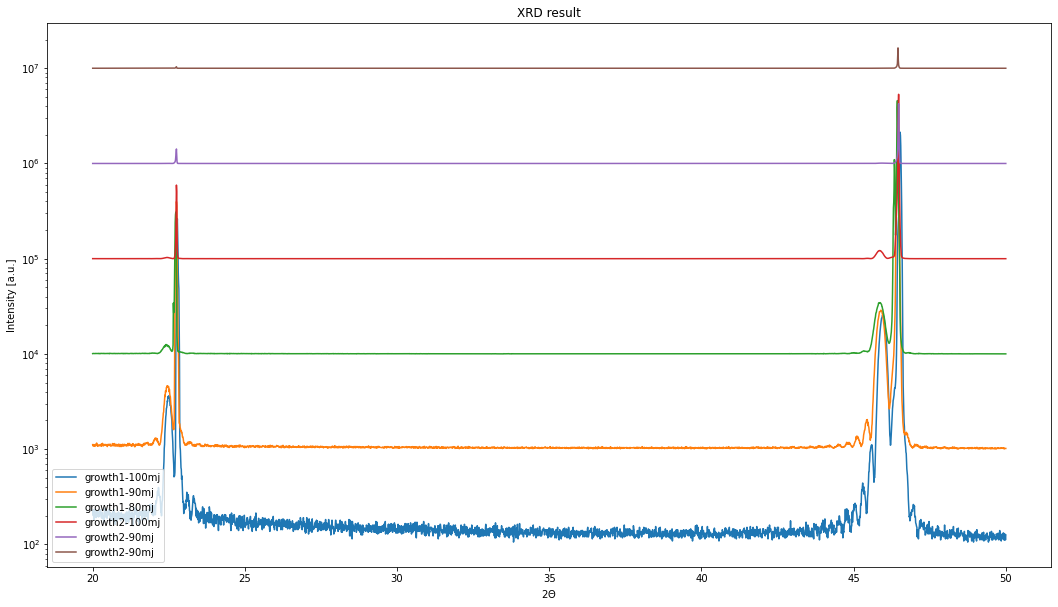

In [107]:
# %matplotlib notebook
%matplotlib inline

files = [
        './xrd/YG021-SRO001-STO001-05252022.xrdml',
        './xrd/YG022-SRO001-STO001-05252022.xrdml',
        './xrd/YG023-SRO001-STO001-05292022-parallel.xrdml',
        './xrd/YG024-SRO001-STO001-05292022.xrdml',
        './xrd/YG025-SRO001-STO001-05302022.xrdml',
        './xrd/YG026-SRO001-STO001-05302022.xrdml',
#         './xrd/YG027-SRO001-STO001-05312022.xrdml',
        ]

labels = ['growth1-100mj', 'growth1-90mj', 'growth1-80mj', 
          'growth2-100mj', 'growth2-90mj', 'growth2-90mj']
plot_xrd(files, labels)

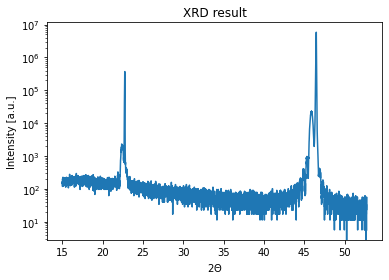

In [4]:
file = './xrd/MA_SRO_STO001_8.xrdml'
plot_xrd(file, save_path=file[:-6]+'.png')

In [56]:
Ys

[[107.95454545454547,
  122.15909090909092,
  105.11363636363637,
  96.5909090909091,
  102.27272727272728,
  142.04545454545456,
  76.70454545454545,
  150.5681818181818,
  82.38636363636364,
  107.95454545454547,
  82.38636363636364,
  125.00000000000001,
  102.27272727272728,
  107.95454545454547,
  99.43181818181819,
  79.54545454545455,
  125.00000000000001,
  119.31818181818183,
  105.11363636363637,
  107.95454545454547,
  127.8409090909091,
  107.95454545454547,
  127.8409090909091,
  76.70454545454545,
  133.52272727272728,
  93.75,
  113.63636363636364,
  116.47727272727273,
  107.95454545454547,
  130.6818181818182,
  110.79545454545455,
  96.5909090909091,
  116.47727272727273,
  119.31818181818183,
  85.22727272727273,
  113.63636363636364,
  142.04545454545456,
  96.5909090909091,
  116.47727272727273,
  122.15909090909092,
  90.90909090909092,
  96.5909090909091,
  76.70454545454545,
  76.70454545454545,
  85.22727272727273,
  88.06818181818183,
  96.5909090909091,
  99.

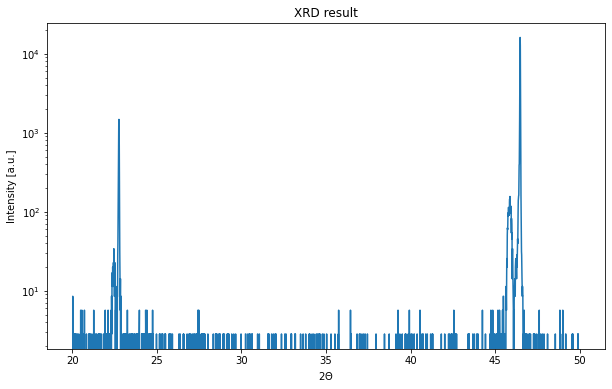

In [2]:
# %matplotlib notebook

file = './xrd/YG004-SRO001-STO001-04232022.xrdml'
plot_xrd(file, save_path=file[:-6]+'.png')

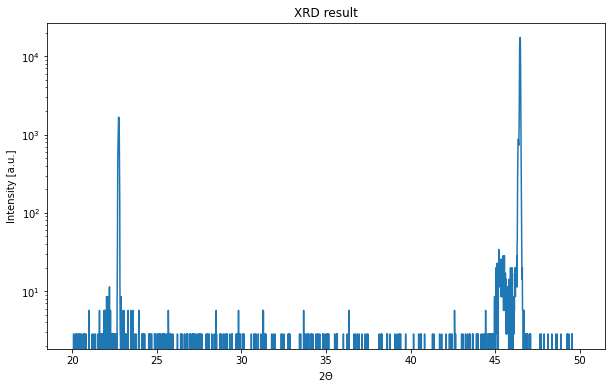

In [3]:
file = './xrd/YG010-SRO001-STO001-04232022.xrdml'
plot_xrd(file, save_path=file[:-6]+'.png')

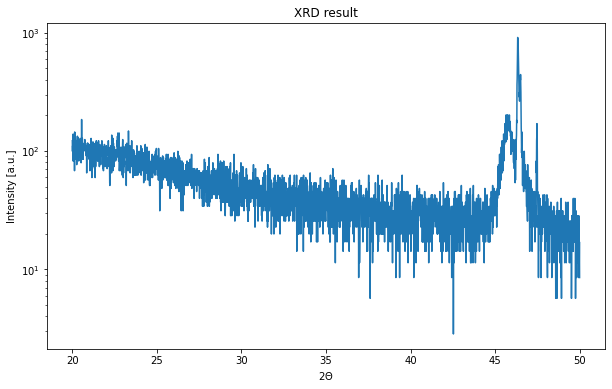

In [4]:
file = './xrd/YG011-SRO001-STO001-04232022.xrdml'
plot_xrd(file, save_path=file[:-6]+'.png')

<IPython.core.display.Javascript object>


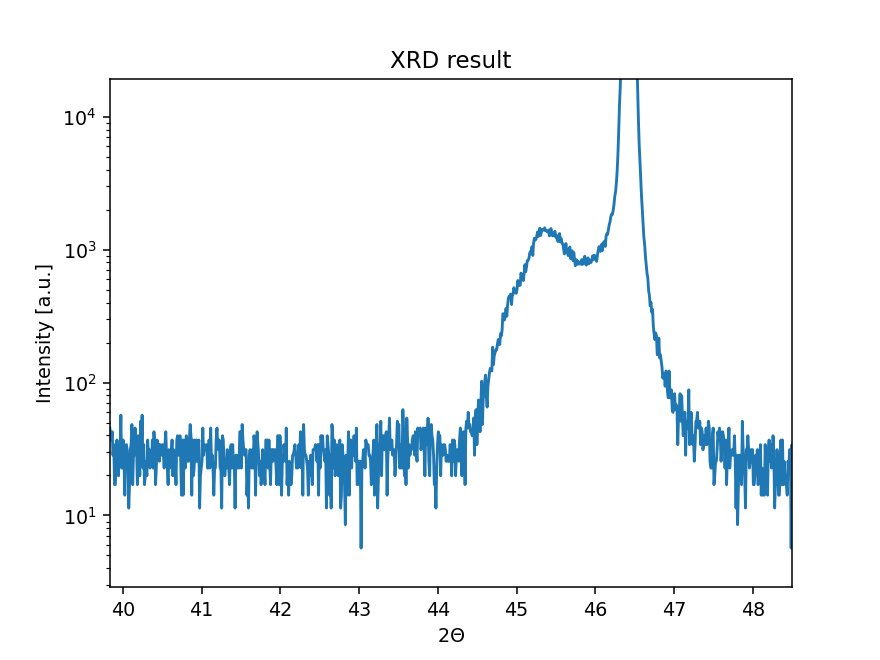

In [13]:
%matplotlib notebook
file = './xrd/YG012-SRO001-STO001-04232022.xrdml'
plot_xrd(file, save_path=file[:-6]+'.png')

<IPython.core.display.Javascript object>


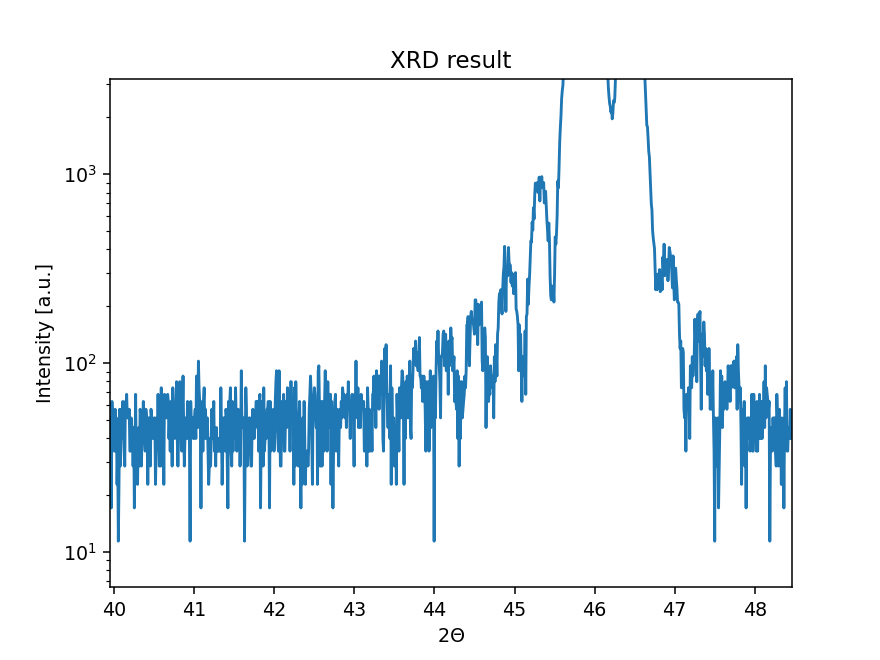

In [14]:
file = './xrd/MA_SRO_STO001_8.xrdml'
plot_xrd(file, save_path=file[:-6]+'.png')

<IPython.core.display.Javascript object>


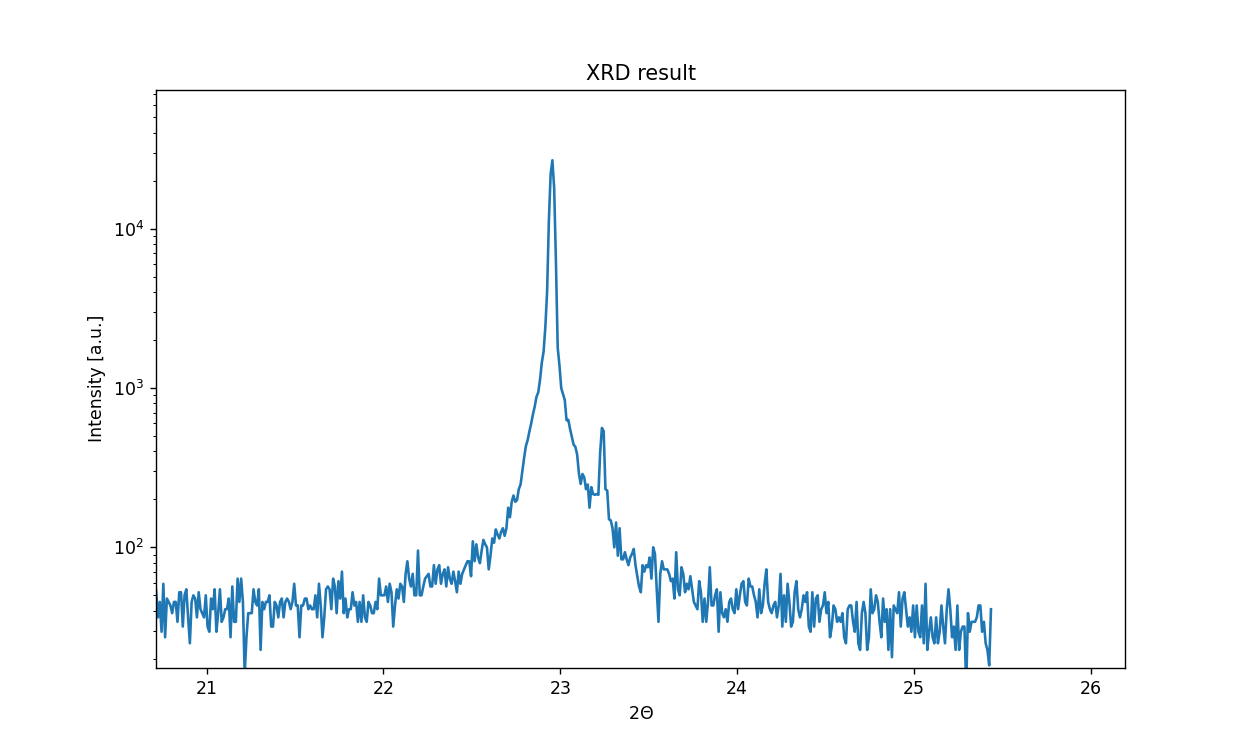

In [6]:
file = './MA_SRO_STO001_8_RC45.8884.xrdml'
plot_xrd(file, save_path=file[:-6]+'.png')

<IPython.core.display.Javascript object>


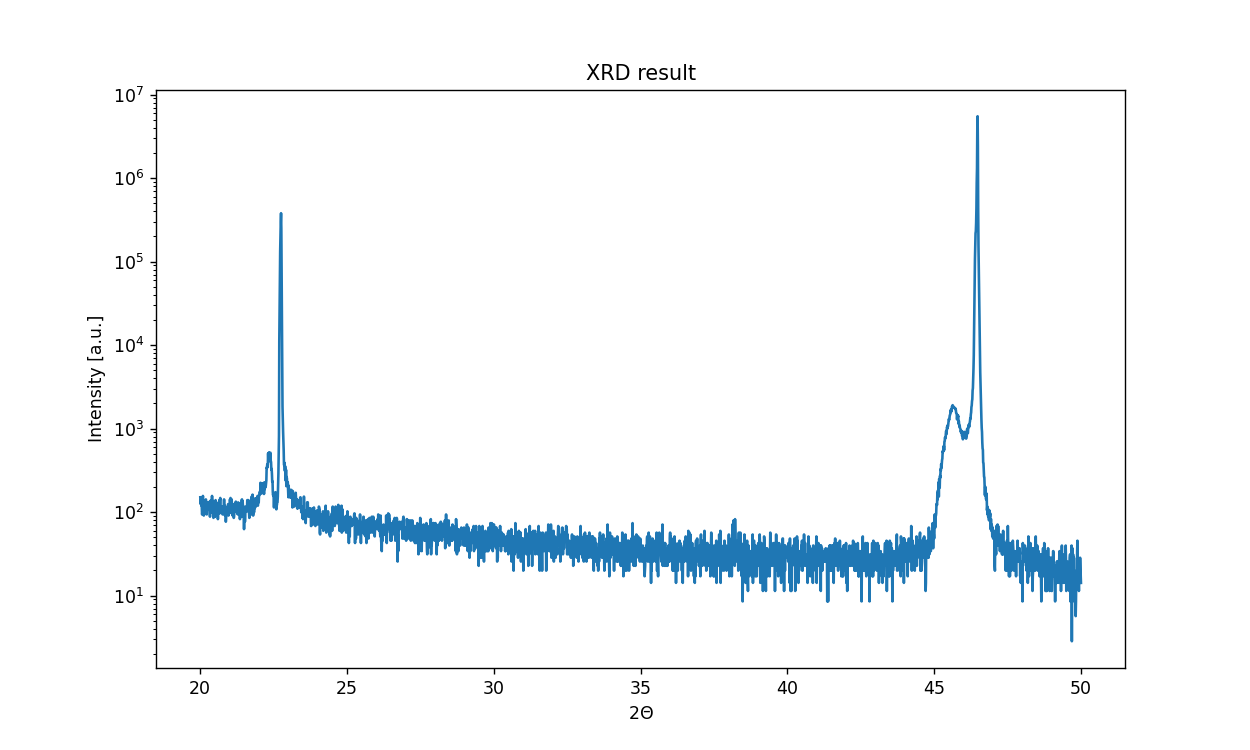

In [12]:
file = './YG003-SRO_001-STO_001-03282022.xrdml'
plot_xrd(file, save_path=file[:-6]+'.png')

# draft

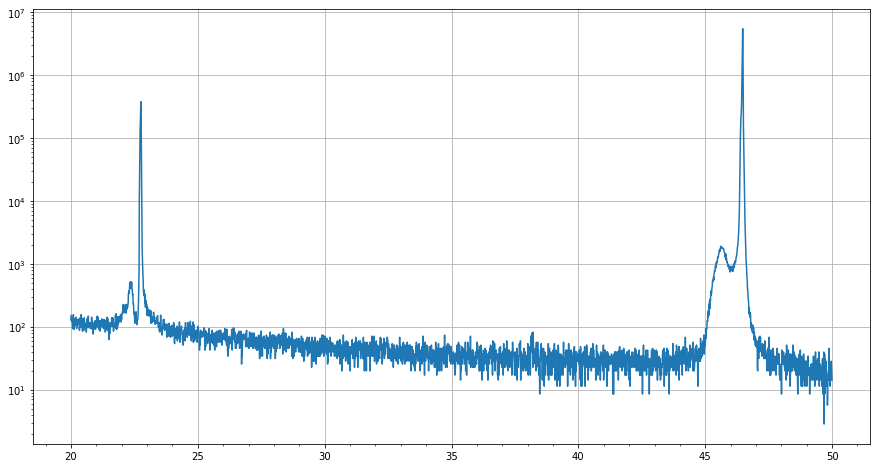

In [73]:
file = './YG003-SRO_001-STO_001-03282022.xrdml'
X = out[0] 
Y = out[1]

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1, 1, 1)
plt.plot(X, Y)

plt.yscale('log',base=10) 

spacing = 1 # This can be your user specified spacing. 
minorLocator = MultipleLocator(spacing)
ax.xaxis.set_minor_locator(minorLocator)

plt.grid()
plt.show()

In [22]:
import matplotlib.pyplot as plt


In [ ]:
xf.scan.

In [18]:
X = xf.scan.ddict['2Theta']
X.shape

(3000,)

In [24]:
Y = xf.scan.ddict['detector']
Y.shape

(3000,)

In [26]:
Y

array([150.56818182, 125.        , 139.20454545, ...,  22.72727273,
        17.04545455,  14.20454545])

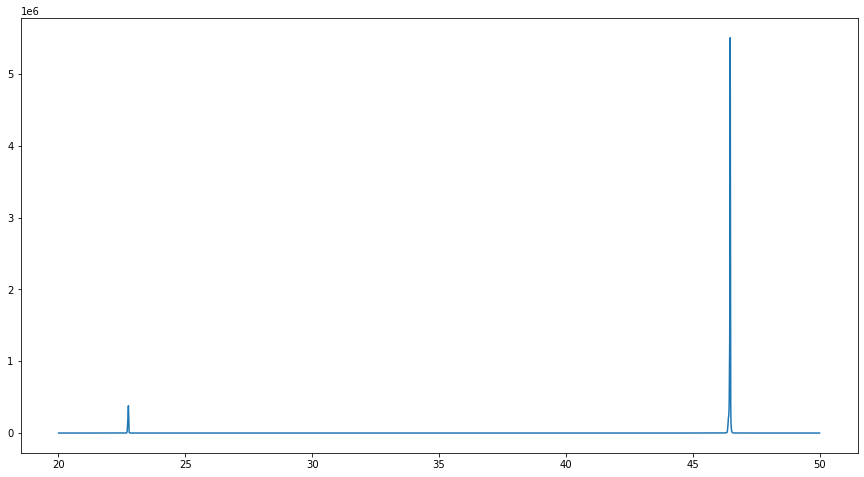

In [27]:
plt.figure(figsize=(15,8))
plt.plot(X, Y)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_xrd(file, title='XRD result', n=1, intensity_difference=500, save_path=None):
    data = pd.read_excel(file, header=29)
    
    X = data['Angle']
    Y = data[' Intensity']
    
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(111)
    
    for i in range(n):
        Y = Y + intensity_difference*i
        plt.plot(X, Y)
        
    plt.title(title)
    ax.set_xlabel(r"2$\Theta}$", )
    ax.set_ylabel('Intensity [a.u.]')

    if save_path:
        plt.savefig(save_path, dpi=1200)
        plt.show()

In [ ]:
# line cut with integration along 2theta to remove beam footprint broadening
qzc, qzint, cmask = xu.analysis.get_radial_scan([qy, qz], psd, [0, 4.5],
                                                1001, 0.155, intdir='2theta')

# line cut with integration along omega
qzc_om, qzint_om, cmask_om = xu.analysis.get_radial_scan([qy, qz], psd, [0, 4.5],
                                                1001, 0.155, intdir='omega')
plt.figure()
plt.semilogy(qzc, qzint, label='Int-dir 2Theta')
plt.semilogy(qzc_om, qzint_om, label='Int-dir Omega')
plt.xlabel(r'scattering angle (deg)')
plt.ylabel(r'intensity (arb. u.)')
plt.legend()
plt.tight_layout()

In [7]:
xf = xu.io.XRDMLFile('./YG003-SRO_001-STO_001-03282022.xrdml')

In [12]:
xf.scan

AttributeError: 'XRDMLMeasurement' object has no attribute 'keys'

In [1]:
import xrdtools

In [3]:
data = xrdtools.read_xrdml('./YG003-SRO_001-STO_001-03282022.xrdml')

ValueError: The file is not conform with hte xrdml schema.

In [4]:
import xrayutilities as xu

ModuleNotFoundError: No module named 'xrayutilities'

In [1]:
! pip install xlrd
! pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_xrd(file, title='XRD result', n=1, intensity_difference=500, save_path=None):
    data = pd.read_excel(file, header=29)
    
    X = data['Angle']
    Y = data[' Intensity']
    
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(111)
    
    for i in range(n):
        Y = Y + intensity_difference*i
        plt.plot(X, Y)
        
    plt.title(title)
    ax.set_xlabel(r"2$\Theta}$", )
    ax.set_ylabel('Intensity [a.u.]')

    if save_path:
        plt.savefig(save_path, dpi=1200)
        plt.show()

In [3]:
file = './YG003-SRO_001-STO_001-03282022.xrdml' # xrd excel file path
save_path = './YG003-SRO_001-STO_001-03282022.svg' # save image file

plot_xrd(file, title='XRD result', n=1, save_path=None)

ValueError: Excel file format cannot be determined, you must specify an engine manually.